# Data analysis with example dataset - fun with Pokémon

In [37]:
import os
import numpy as np
import pandas as pd
from IPython.display import Image
from matplotlib import pyplot as plt
%matplotlib inline 
pd.options.mode.chained_assignment = None  # default='warn'

Pokémon is a media franchise managed by The Pokémon Company, a Japanese consortium between Nintendo, Game Freak, and Creatures. It now spans video games, trading card games, animated television shows and movies, comic books, and toys.

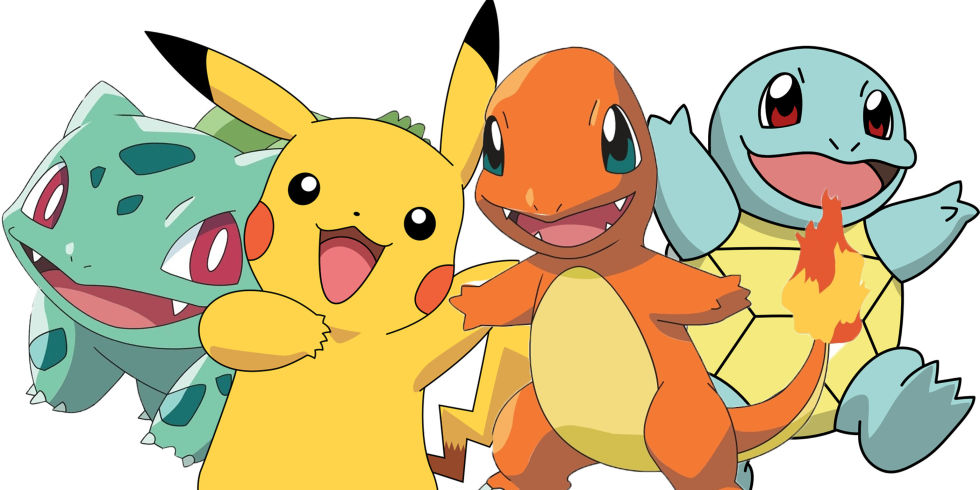

In [3]:
Image('http://cdn-static.denofgeek.com/sites/denofgeek/files/pokemon_4.jpg')

### 1. Read data into memory

Given we have data ready on the disk, we can read it into pandas DataFrame, that is stored in python memory. But are we in the same directory? Let's check to be sure...

In [2]:
# prints current working directory full path
os.getcwd()

'C:\\Users\\stefan\\Google Drive OldZZZ\\Data Science\\Data Activities\\PyLadies'

In [ ]:
# to change directory one level above is as simple as:
cd ..
# or os.chdir('..')

We are still not in the same directory as the dataset, so we can either change working directory to the directory with dataset or read the file from that directory. Let's try that.

In [3]:
# reads csv file into 
#poke = pd.read_csv('./Datasets/Pokemon.csv')
poke=pd.read_csv('Pokemon.csv', sep=';')

In [ ]:
# shows first  few rows of table
poke.head()

**Q: What is a DataFrame in pandas?**

It's a collection of Series (columns) with the same lenght that are made of numpy arrays.

In [ ]:
# data frame
type(poke)

In [ ]:
# series
type(poke['Name'])

In [ ]:
# numpy array
type(poke['Name'].values)

In [ ]:
# basic python/numpy data type - str, int, float...
type(poke['Name'].values[0])

In [ ]:
poke['Name']

In [ ]:
len(poke)

In [ ]:
len(poke) == len(poke['Name'])

### 2. Explore dataset

What's in the dataset and how does it look like? In data exploration, we try to answer these questions.

In [ ]:
# general information about columns
poke.info()

In [ ]:
# summary statistics of numeric columns
poke.describe()

In [ ]:
# How many null values are there?
poke.isnull().sum()

In [ ]:
# How many legendary and common pokemon are there?
poke['Legendary'].sum()

Q: Can you tell me how is the number calculated and if it is correct?

#### Slicing and filtering - Is there pikachu and what kind of pokemon is he? 

In [ ]:
# boolean filtering
poke[poke['Name'] == 'Pikachu']

In [ ]:
# subsetting with .loc and .iloc
poke[poke.loc[:,'Name'].isin(['Pikachu', 'Bulbasaur', 'Charmander', 'Squirtle'])]

In [ ]:
# creating subset data frame
image_poke = poke[poke.loc[:,'Name'].isin(['Pikachu', 'Bulbasaur', 'Charmander', 'Squirtle'])]
image_poke

Let's make some simple plot.

In [ ]:
# how to make plot with pandas and what arguments to pass?
image_poke.plot??
# two question marsk show full docstring that is present at documentation webpage for pandas.

In [ ]:
# this draws it in a cell
# barplot that compares attack of chosen pokemon 
image_poke.plot.bar(x='Name', y='Attack', color=['green', 'red', 'blue', 'yellow'], title='Attack Comparison')

### 3. Clean data

Can we work with the dataset as it is or do we need to do some adjustments? Filling/removing null values, creating new columns with calculated values, deleting redundant columns, removing incomplete rows, creating relevant subsets of dataset, converting datatypes, renaming column names... These are all part of data cleaning step that is required before we can further analyze the data.

Renaming columns

In [ ]:
poke.columns
poke = poke.rename(columns={'#':'Number'})

Subset of pokemon that are only common.

In [ ]:
only_common = # fill in poke[poke['']]
only_common

Subset of pokemon that don't contain 'Mega' in their name.

In [ ]:
# Finish subset of DataFrame using condition so that only pokemon that don't have Mega in their name are selected (hint: ~)
no_mega = # finish the subset ['Name'].str.contains('Mega')

**Group by** operation to aggregate data.

In [ ]:
# check if there is only 1 pokemon for every number
poke['#'].groupby(poke['#']).count().sort_values(ascending=False);
# we don't want to show so long output afterwards, so we can just add ';' behind the command not to show the output afterwards.

Removing mega wasn't enough. Let's consider all pokemon with same number as duplicates, drop them and keep only the first one.

In [ ]:
# Finish the subset
nodup_poke =  # .drop_duplicates('Number', keep='first', inplace=False)
nodup_poke

In [ ]:
# Reindex the dataframe, so the first index is 0 and the last is n-1
nodup_poke.reset_index(inplace=True, drop=True)
nodup_poke

Now that we have desired and clean dataset, let's move to another step.

### 4. Clean Data Processing

In this step, we are ready to answer our questions with our dataset. In case we don't have any specific questions, we are doing just exploratory data analysis - looking what is inside the data.

So here are some questions:
- Which pokemon type is the most frequent?
- Which pokemon type is the strongest and which the weakest? (according to total stats)
- What are the 5 strongest pokemon among the common pokemon?
- Which pokemon generation has the biggest average total stats?
- How strong is Pikachu among pokemon of the same type?

In [ ]:
# How many unique pokemon are there in the remaining dataset?
len(nodup_poke['Number'].unique())

In [ ]:
# Which pokemon type is the strongest and which the weakest on average? (according to total stats)
strongest_type_avg = nodup_poke[['Type 1','Total']].groupby(nodup_poke['Type 1']).mean().sort_values(by='Total', ascending=False)
strongest_type_avg

What happened in the previous line of code? Let's look:
1. Choose a data frame subset based on what values you want to see in result -  **nodup_poke[['Type 1','Total']]**
2. Choose a column you want the table to be grouped by. To group values means put all rows with the same value of selected column into one row. - **groupby(nodup_poke['Type 1'])**
3. Now that we have many values in the same row, we need to transform them into one value with aggregation function. Typical examples are *count, average, sum, max* - **mean()**
4. The last step is sorting the result based on values in descending order - **sort_values(by='Total', ascending=False)**

Try the same logic in the upcoming examples:

In [ ]:
# Find the strongest pokemon in each group based on Type 1 and order them alphabetically from A-Z.
strongest_type_one = # yep, fill in the rest :)
strongest_type_one

In [ ]:
# Which pokemon type is the most frequent?
type_frequency = nodup_poke['Type 1'].# fill in the rest, sort from largest to smallest
type_frequency

In [ ]:
# What are the 5 strongest pokemon among the common pokemon?
top5_poke = nodup_poke[['Name', 'Total']].sort_values(by='Total', ascending=False)[0:5]
top5_poke

In [ ]:
# Which pokemon generation has the biggest average total stats?
generation_comparison = # generation and total columns. groupby column. aggregation function. sort function by value
generation_comparison

In [ ]:
# What type is pikachu?

pikachu_type = nodup_poke['Type 1'][nodup_poke['Name'] == 'Pikachu'].values[0]
pikachu_type

In [9]:
# How strong is Pikachu among pokemon of the same type? Hint: debugging
pikachu_rank = poke[poke['Type 1'] == 'Electric'].sort_values(by='Type 1')
#pikachu_rank = nodup_poke[nodup_poke['Type 1'] == pikachu_type].sort_values()
pikachu_rank

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False
464,417,Pachirisu,Electric,NaN,405,60,45,70,45,90,95,4,False
513,462,Magnezone,Electric,Steel,535,70,70,115,130,90,60,4,False
517,466,Electivire,Electric,NaN,540,75,123,67,95,85,95,4,False
531,479,Rotom,Electric,Ghost,440,50,50,77,95,77,91,4,False
532,479,RotomHeat Rotom,Electric,Fire,520,50,65,107,105,107,86,4,False
533,479,RotomWash Rotom,Electric,Water,520,50,65,107,105,107,86,4,False
534,479,RotomFrost Rotom,Electric,Ice,520,50,65,107,105,107,86,4,False
535,479,RotomFan Rotom,Electric,Flying,520,50,65,107,105,107,86,4,False
450,405,Luxray,Electric,NaN,523,80,120,79,95,79,70,4,False


In [ ]:
# reset index of table to start from 0 to n-1
pikachu_rank.reset_index(inplace=True)
pikachu_rank

### 5. Results visualization

- Create a histogram of all common pokemon's total stats
- Create a boxplot of total stats by type
- Create a boxplot of total stats by generation
- Create a barplot of total stats by generation
- Show Pikachu's total stats among other pokemon of the same type together with generation of pokemon

In [ ]:
# Create a histogram of all common pokemon's total stats
# fill in missing .plot.hist(bins=15)

In [ ]:
import matplotlib.cm as cm  # these would normally be at the beginning of the notebook

# colormaps https://matplotlib.org/examples/color/colormaps_reference.html
type_colors = cm.spring(np.linspace(0.05,0.95,len(type_frequency)))
type_frequency.plot.bar(color=type_colors)

In [ ]:
# Create a boxplot of average total stats by type. Hint: use tables we created in previous step
# fill_in .boxplot(column='Total', by='Type 1')

In [ ]:
# Create a boxplot of total stats by generation
# fill in missing .boxplot(column='Total', by='Generation')

In [ ]:
# Create a barplot of total stats by generation
gener = nodup_poke[['Total']].groupby(nodup_poke['Generation']).mean().sort_values(by='Total',ascending=False)
gener.plot.bar()

In [ ]:
# Create a barplot of strongest pokemon in each Type 1. One color for all is fine.
# fill in all :) 

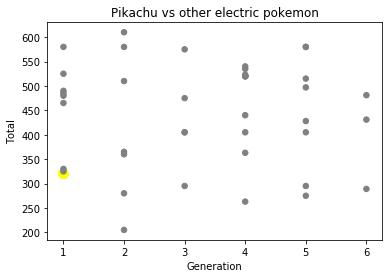

In [36]:
# Show Pikachu's total stats among other pokemon of the same type together with generation of pokemon
pikachu_rank['color'] = 'Grey'
pikachu_rank['size'] = 30
pikachu_rank['color'][pikachu_rank['Name']=='Pikachu']='Yellow'
pikachu_rank['size'][pikachu_rank['Name']=='Pikachu']=100
pika_plot = pikachu_rank.plot.scatter(x='Generation', y='Total', 
                                      c=pikachu_rank['color'], s=pikachu_rank['size'],
                          title='Pikachu vs other electric pokemon')

Save the plot as png file

In [34]:
fig = pika_plot.get_figure()
fig.savefig('pika_plot.png')